# Credit Card Fraud Detection

### Summary

The Credit Card Fraud Detection project aimed to identify fraudulent transactions using machine learning techniques. A Random Forest Classifier model was trained on the credit card dataset, which contained anonymized features and imbalanced classes. Key steps included data preprocessing, feature scaling, and model evaluation. The model’s performance was assessed using metrics such as precision, recall, and a confusion matrix. Visualizations like heatmaps and confusion matrices provided insights into the data and results. This project demonstrated the practical application of machine learning for fraud detection and highlighted the importance of handling imbalanced datasets effectively.

In [3]:
#importing all necessaries modules and function
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#### Loading dataset

In [5]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Dataset description

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
It contains 284,807 transactions, and the dataset is highly imbalanced, with only 0.172% of transactions being fraudulent.

- **Time**: The seconds elapsed between this transaction and the first transaction in the dataset.
- **V1-V28**: Principal component analysis (PCA) applied features.
- **Amount**: Transaction amount.
- **Class**: Response variable (1 for fraud, 0 for non-fraud).

In [7]:
# to check total number of fraud cases and real cases

print("Number of Fraud cases: ", len(df[df['Class'] == 1]))
print("Number of real cases: ", len(df[df['Class'] ==0]))

Number of Fraud cases:  492
Number of real cases:  284315


In [8]:
print("Data shape: ", df.shape)

Data shape:  (284807, 31)


#### Simple heatmap of the dataset

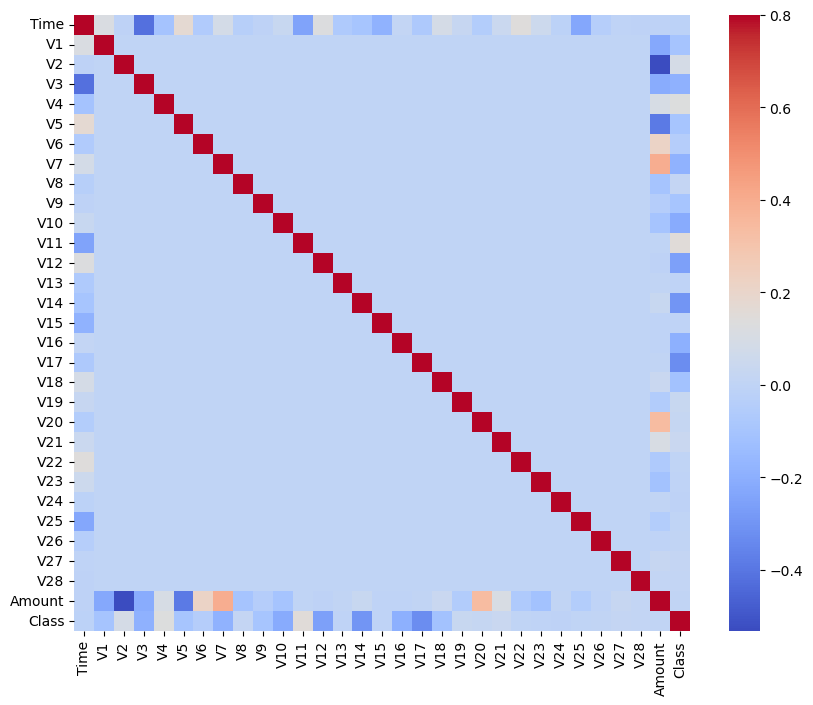

In [10]:
# to plot correlation map of the dataset
corrmap = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corrmap, square=True, vmax= .8, annot=False, cmap='coolwarm')
plt.show()

### Data Processing
#### Scaling the dataset using standard scalar and spliting it into train and test data

In [12]:
#separating dependent and independent variables
X = df.drop('Class', axis='columns')
y = df['Class']

In [13]:
#scaling data
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [14]:
#splitting data set into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

### Model creation and training

In [16]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf_classifier = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(estimator=rf_classifier,
#                           param_grid=param_grid,
#                           cv=5,
#                           n_jobs=-1,
#                           scoring='accuracy')

# grid_search.fit(X_train, y_train)

# # Print the best parameters found by GridSearchCV
# print("Best parameters found:", grid_search.best_params_)

# # Get the best model
# best_rf_classifier = grid_search.best_estimator_

# # Evaluate the best model on the test data
# accuracy = best_rf_classifier.score(X_test, y_test)
# print("Accuracy on test data:", accuracy)

In [17]:
# creating an instance of model and training it
model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=2, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50, random_state=42)

### Model evaluation

In [19]:
#testing the model using test data
y_pred = model.predict(X_test)

#### Accuracy and classification report

In [21]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification report: \n{report}")

Accuracy: 0.999385555282469
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.72      0.80        96

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



#### Confusion matrix

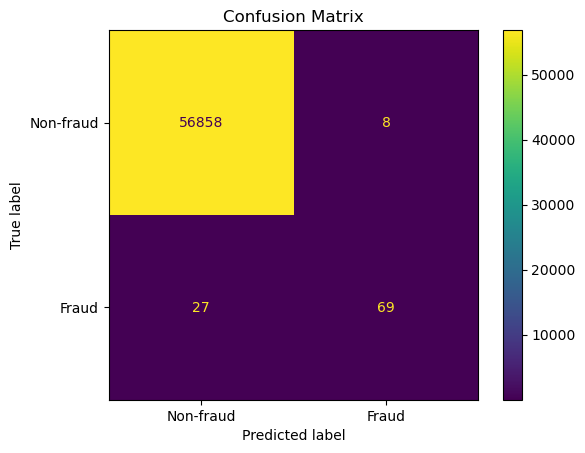

In [23]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Non-fraud", "Fraud"])
display.plot()
plt.title("Confusion Matrix")
plt.show()

#### Testing the model

In [25]:
#sample data to check model 
sample_data = pd.DataFrame({
    'Time': [50000, 470],
    'V1': [-1.359, 1.191],
    'V2': [1.191, 3.019],
    'V3': [-0.109, 4.30],
    'V4': [1.088, 4.732],
    'V5': [-0.121, 3.624],
    'V6': [-2.261, 0.971],
    'V7': [0.524, -0.229],
    'V8': [0.247, -0.037],
    'V9': [0.378, 0.313],
    'V10': [-0.386, 0.250],
    'V11': [-0.044, -0.257],
    'V12': [0.194, -0.069],
    'V13': [0.019, 0.208],
    'V14': [-0.996, 0.025],
    'V15': [0.153, -0.018],
    'V16': [0.101, -0.554],
    'V17': [0.036, 0.058],
    'V18': [-0.029, -0.018],
    'V19': [0.016, 0.181],
    'V20': [0.078, -0.271],
    'V21': [0.091, -0.110],
    'V22': [-0.027, 0.066],
    'V23': [0.005, 0.068],
    'V24': [-0.012, -0.022],
    'V25': [0.083, 0.049],
    'V26': [0.002, 0.012],
    'V27': [0.015, -0.013],
    'V28': [-0.001, 0.0354],
    'Amount': [1000.00, 1.00]
})

#output of the sample data(0-non fraud, 1-fraud)
sample_outputs = np.array([0, 1])

scaled_sample = ss.transform(sample_data)
y_pred = np.array(model.predict(scaled_sample))
if sample_outputs.all() == y_pred.all():
    print("correct prediction")
else:
    print("wrong prediction")

correct prediction


### Conclusion

In this project, we built a fraud detection model using Random Forest Classifier on the Credit Card Fraud Detection dataset. We preprocessed the data, standardized features, and evaluated the model using a confusion matrix. The model successfully identified fraudulent transactions with good accuracy.

This project demonstrates how machine learning can help detect fraud in financial transactions. Future improvements could include handling class imbalance, tuning model parameters, and exploring deep learning techniques for better performance.